In [1]:
import pandas as pd
import sklearn

In [2]:
# Reading the dataset
train_df = pd.read_csv('creditcard.csv')
train_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
# Importing the features
X = train_df.iloc[:,1:29]
Y = train_df['Class']

In [5]:
# Use cross validation to create training and testing part
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.4, random_state=0)

In [6]:
# SVM implementation
svc = SVC()                                                   
svc.fit(x_train,y_train)                                        # we are training the model
y_pred = svc.predict(x_test)                                     # to make a prediction we need to pass x_test as parameter
svc_accuracy = round(accuracy_score(y_test,y_pred) * 100,2)      # Model Evalution
print("SVC Score:",svc_accuracy)
print("SVM Classification Report:\n",classification_report(y_test,y_pred))

SVC Score: 99.94
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113724
           1       0.94      0.67      0.79       199

    accuracy                           1.00    113923
   macro avg       0.97      0.84      0.89    113923
weighted avg       1.00      1.00      1.00    113923



In [7]:
##KNN
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)
Y_pred= knn.predict(x_test)
acc_knn= round(knn.score(x_train, y_train) * 100, 2)
print("KNN accuracy is:",acc_knn) 
print("KNN Classification Report:\n",classification_report(y_test,Y_pred))

KNN accuracy is: 99.96
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113724
           1       0.93      0.76      0.84       199

    accuracy                           1.00    113923
   macro avg       0.97      0.88      0.92    113923
weighted avg       1.00      1.00      1.00    113923



In [8]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter

0.7.0


In [14]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
341177    1
341178    1
341179    1
341180    1
341181    1
Name: Class, Length: 341182, dtype: int64

In [9]:
# original class distribution 
counter = Counter(y_train)
print("original class distribution is compressed of 0: {} and 1 :{}".format(counter[0],counter[1]))

original class distribution is compressed of 0: 170591 and 1 :293


In [10]:
# after applying the SMOTE oversampling technique, we now see that the number of observations in each class are equal
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
counter = Counter(y_train)
print("After applying the SMOTE oversampling technique 0: {} and 1 :{}".format(counter[0],counter[1]))

After applying the SMOTE oversampling technique 0: 170591 and 1 :170591


In [11]:
# KNN
knn = KNeighborsClassifier(n_neighbors=10)
model=knn.fit(x_train, y_train)
pred = model.predict(x_test)
pred
print("Training set score: {:.2f}".format(knn.score(x_train, y_train)))
print("Validation set score: {:.2f}".format(knn.score(x_test, y_test)))

Training set score: 1.00
Validation set score: 1.00


C:\Users\Sai Pavan\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


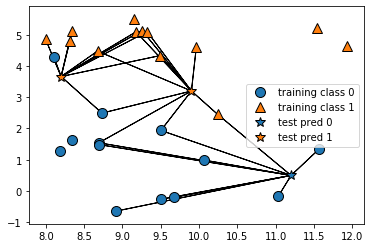

In [12]:
# KNN Plot
# visual of the training classes versus test predictions as illustrated by the KNN model
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_knn_classification(n_neighbors=10)
plt.show()

In [13]:
# Classification report of the model
acc_knn= round(knn.score(x_train, y_train) * 100, 2)
print("KNN accuracy is:",acc_knn) 
print("KNN Classification Report:\n",classification_report(y_test,pred))

KNN accuracy is: 99.9
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113724
           1       0.37      0.86      0.52       199

    accuracy                           1.00    113923
   macro avg       0.68      0.93      0.76    113923
weighted avg       1.00      1.00      1.00    113923

